In [20]:
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [21]:
common_config.figure_journal_basic()

In [22]:
import pertpy as pt
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
adata = sc.read_h5ad("data/zhang_preprocessed.h5ad")
adata

AnnData object with n_obs × n_vars = 146358 × 4000
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster', 'Timepoint', 'Celltype'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'Celltype_colors', 'Group_colors', 'Treatment_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [24]:
adata.obs["Group"].value_counts()

Group
Pre-treat., Partial response     57295
Post-treat., Stable disease      31626
Post-treat., Partial response    29659
Pre-treat., Stable disease       27778
Name: count, dtype: int64

In [25]:
def filter_data(adata_temp):
    isecs = pd.crosstab(adata_temp.obs["Cluster"], adata_temp.obs["Group"])
    celltypes = isecs[(isecs >0).all(axis=1)].index.values.tolist()
    adata_temp = adata_temp[adata_temp.obs["Cluster"].isin(celltypes)]
    return adata_temp

In [26]:
adata_chemo = adata[adata.obs["Treatment"] == "Chemo"]
adata_chemo = filter_data(adata_chemo)
adata_chemo.obs["Group"].value_counts()

Group
Post-treat., Stable disease      20659
Pre-treat., Partial response     16827
Post-treat., Partial response    12137
Pre-treat., Stable disease       11807
Name: count, dtype: int64

In [27]:
adata_chemo_pdl1 = adata[adata.obs["Treatment"] == "Anti-PD-L1+Chemo"]
adata_chemo_pdl1 = filter_data(adata_chemo_pdl1)
adata_chemo_pdl1.obs["Group"].value_counts()

Group
Pre-treat., Partial response     40251
Post-treat., Partial response    16379
Pre-treat., Stable disease       13435
Post-treat., Stable disease      10717
Name: count, dtype: int64

In [28]:
distance = pt.tl.Distance("mse", obsm_key="X_pca")
df_all = distance.pairwise(adata, groupby="Group", show_progressbar=False)

df_chemo = distance.pairwise(adata_chemo, groupby="Group", show_progressbar=False)

df_chemo_pdl1 = distance.pairwise(adata_chemo_pdl1, groupby="Group", show_progressbar=False)

In [29]:
global_max = max(df_all.max(axis=None), df_chemo.max(axis=None), df_chemo_pdl1.max(axis=None))
global_min = min(df_all.min(axis=None), df_chemo.min(axis=None), df_chemo_pdl1.min(axis=None))

order = df_all.index.values

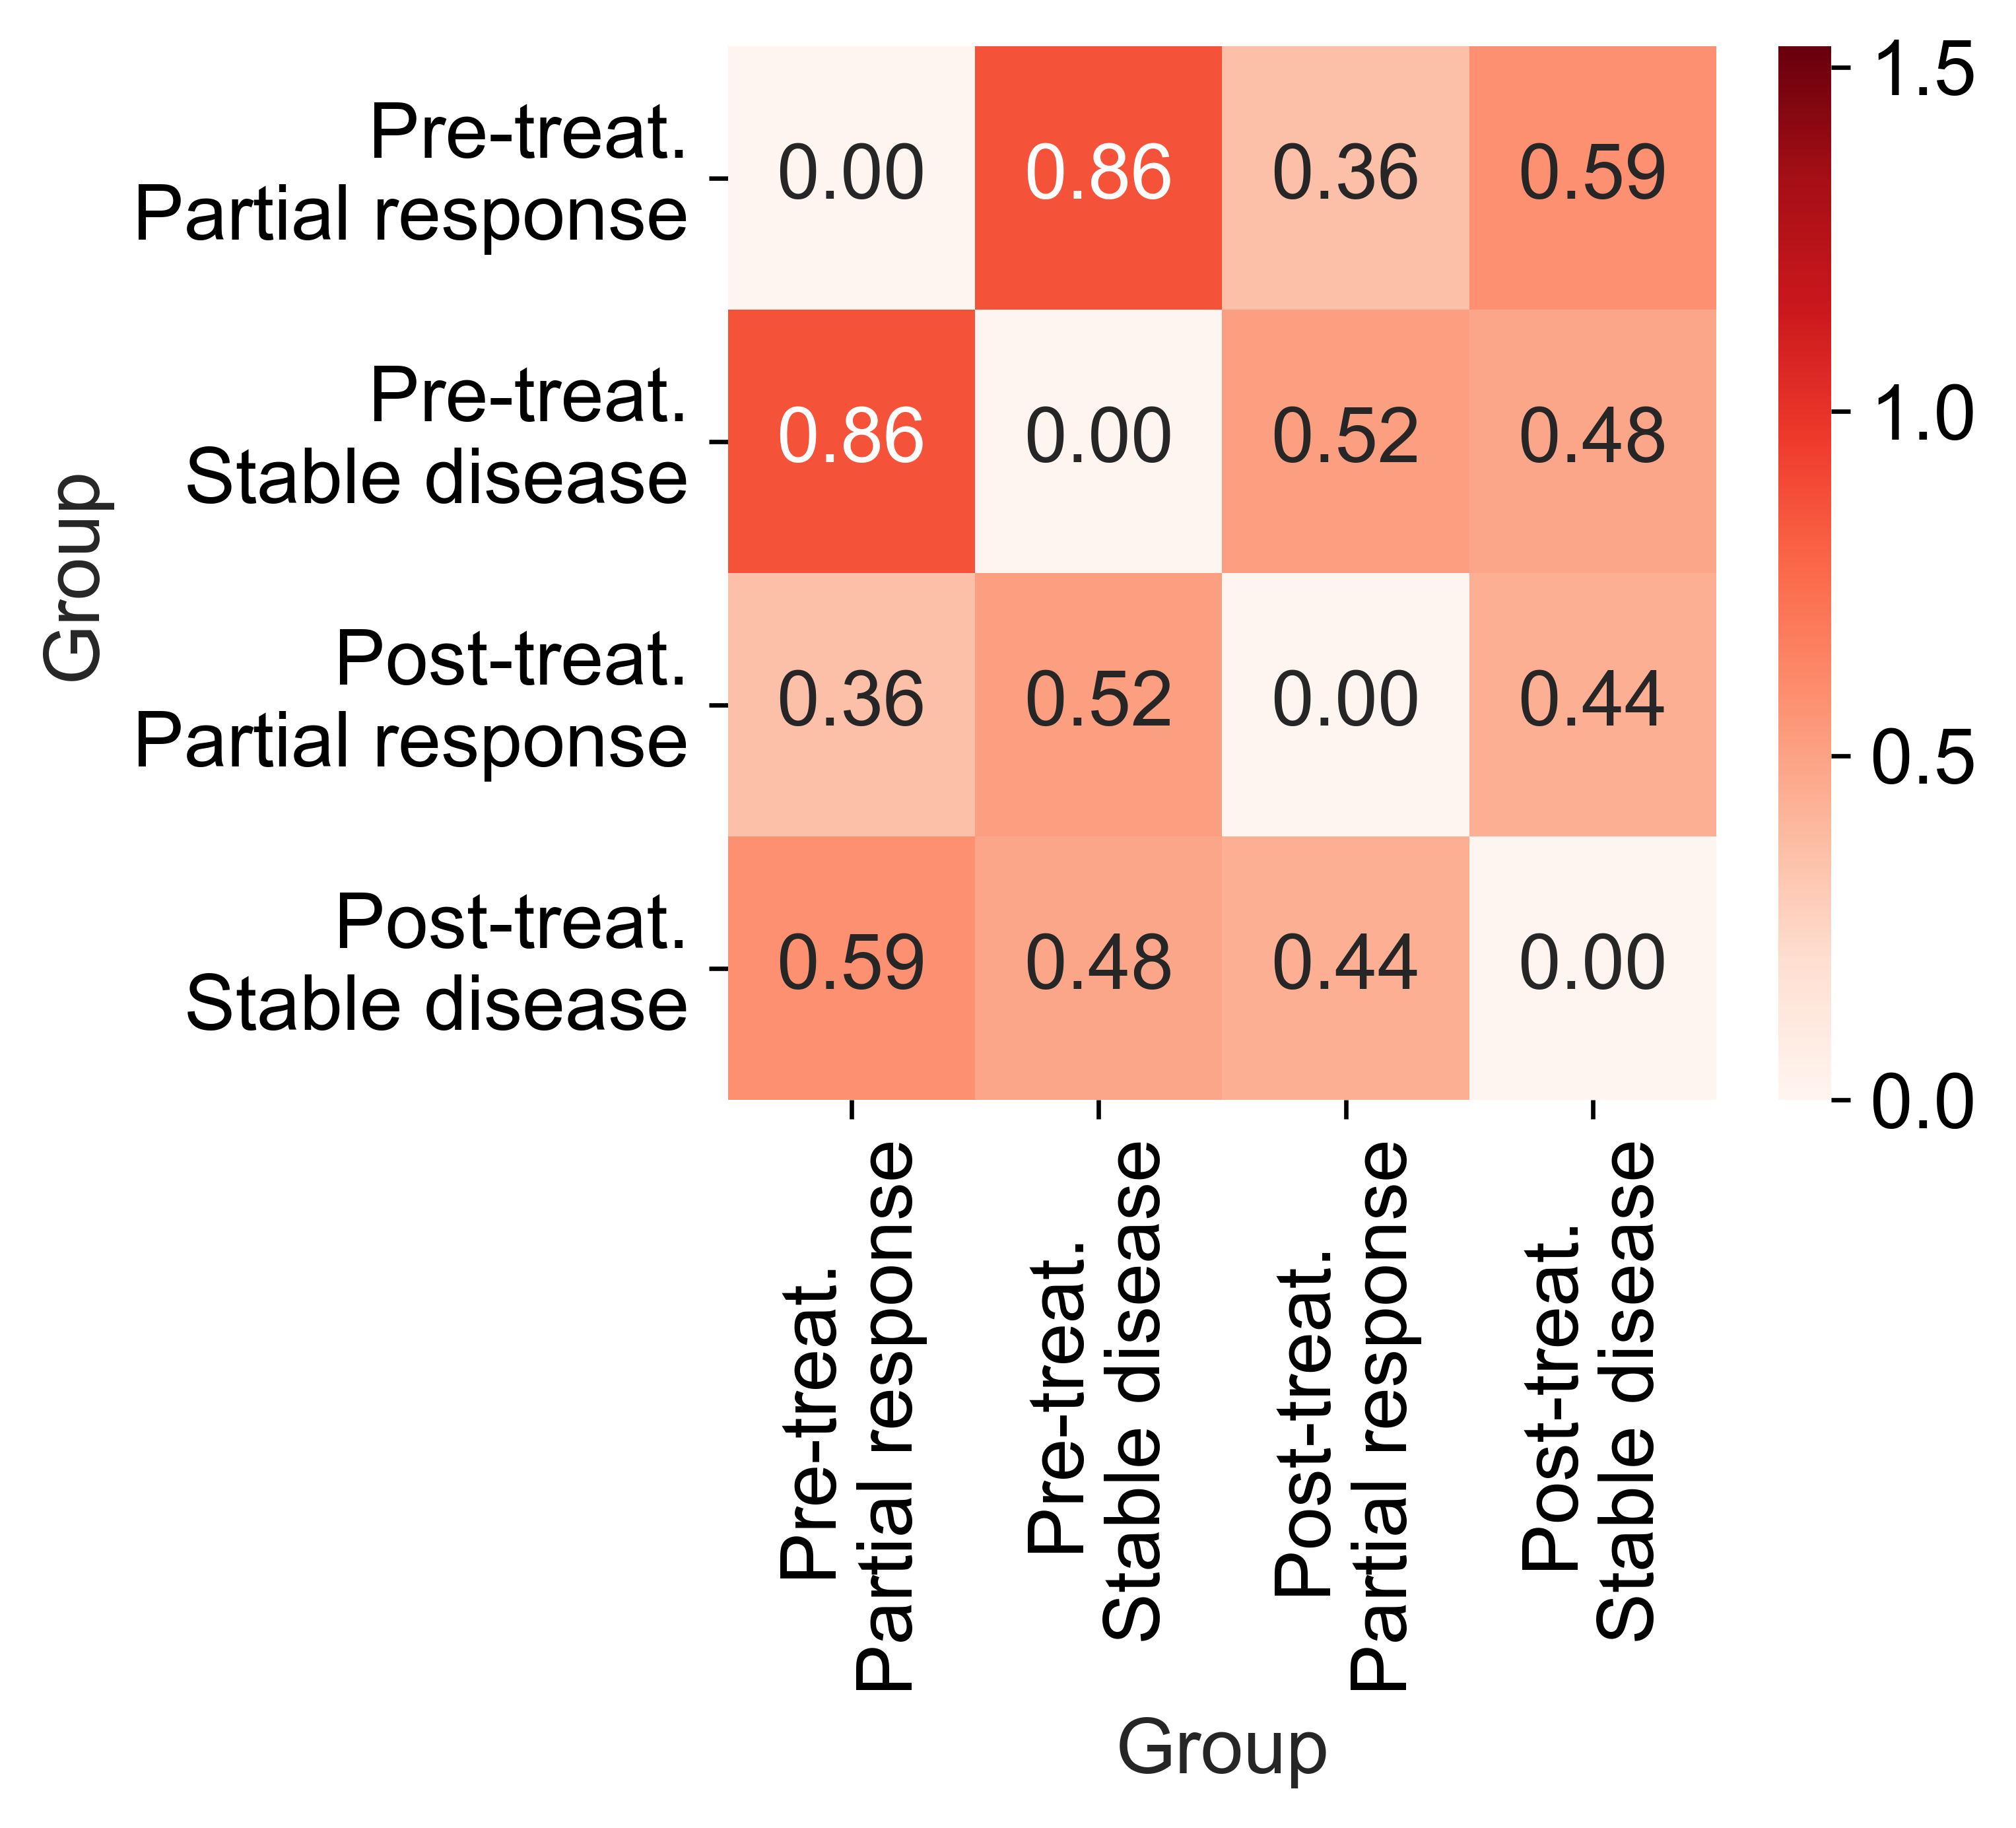

In [30]:
fig, ax = plt.subplots(figsize=(4, 3.5))
sns.heatmap(df_all, annot=True, fmt=".2f", vmin=global_min, vmax=global_max, cmap="Reds", ax=ax)
plt.xticks(labels=[x.get_text().replace(", ", "\n") for x in ax.get_xticklabels()], ticks=ax.get_xticks())
plt.yticks(labels=[x.get_text().replace(", ", "\n") for x in ax.get_yticklabels()], ticks=ax.get_yticks())
plt.savefig("figures/mse_distance_matrix_all.pdf", bbox_inches="tight")

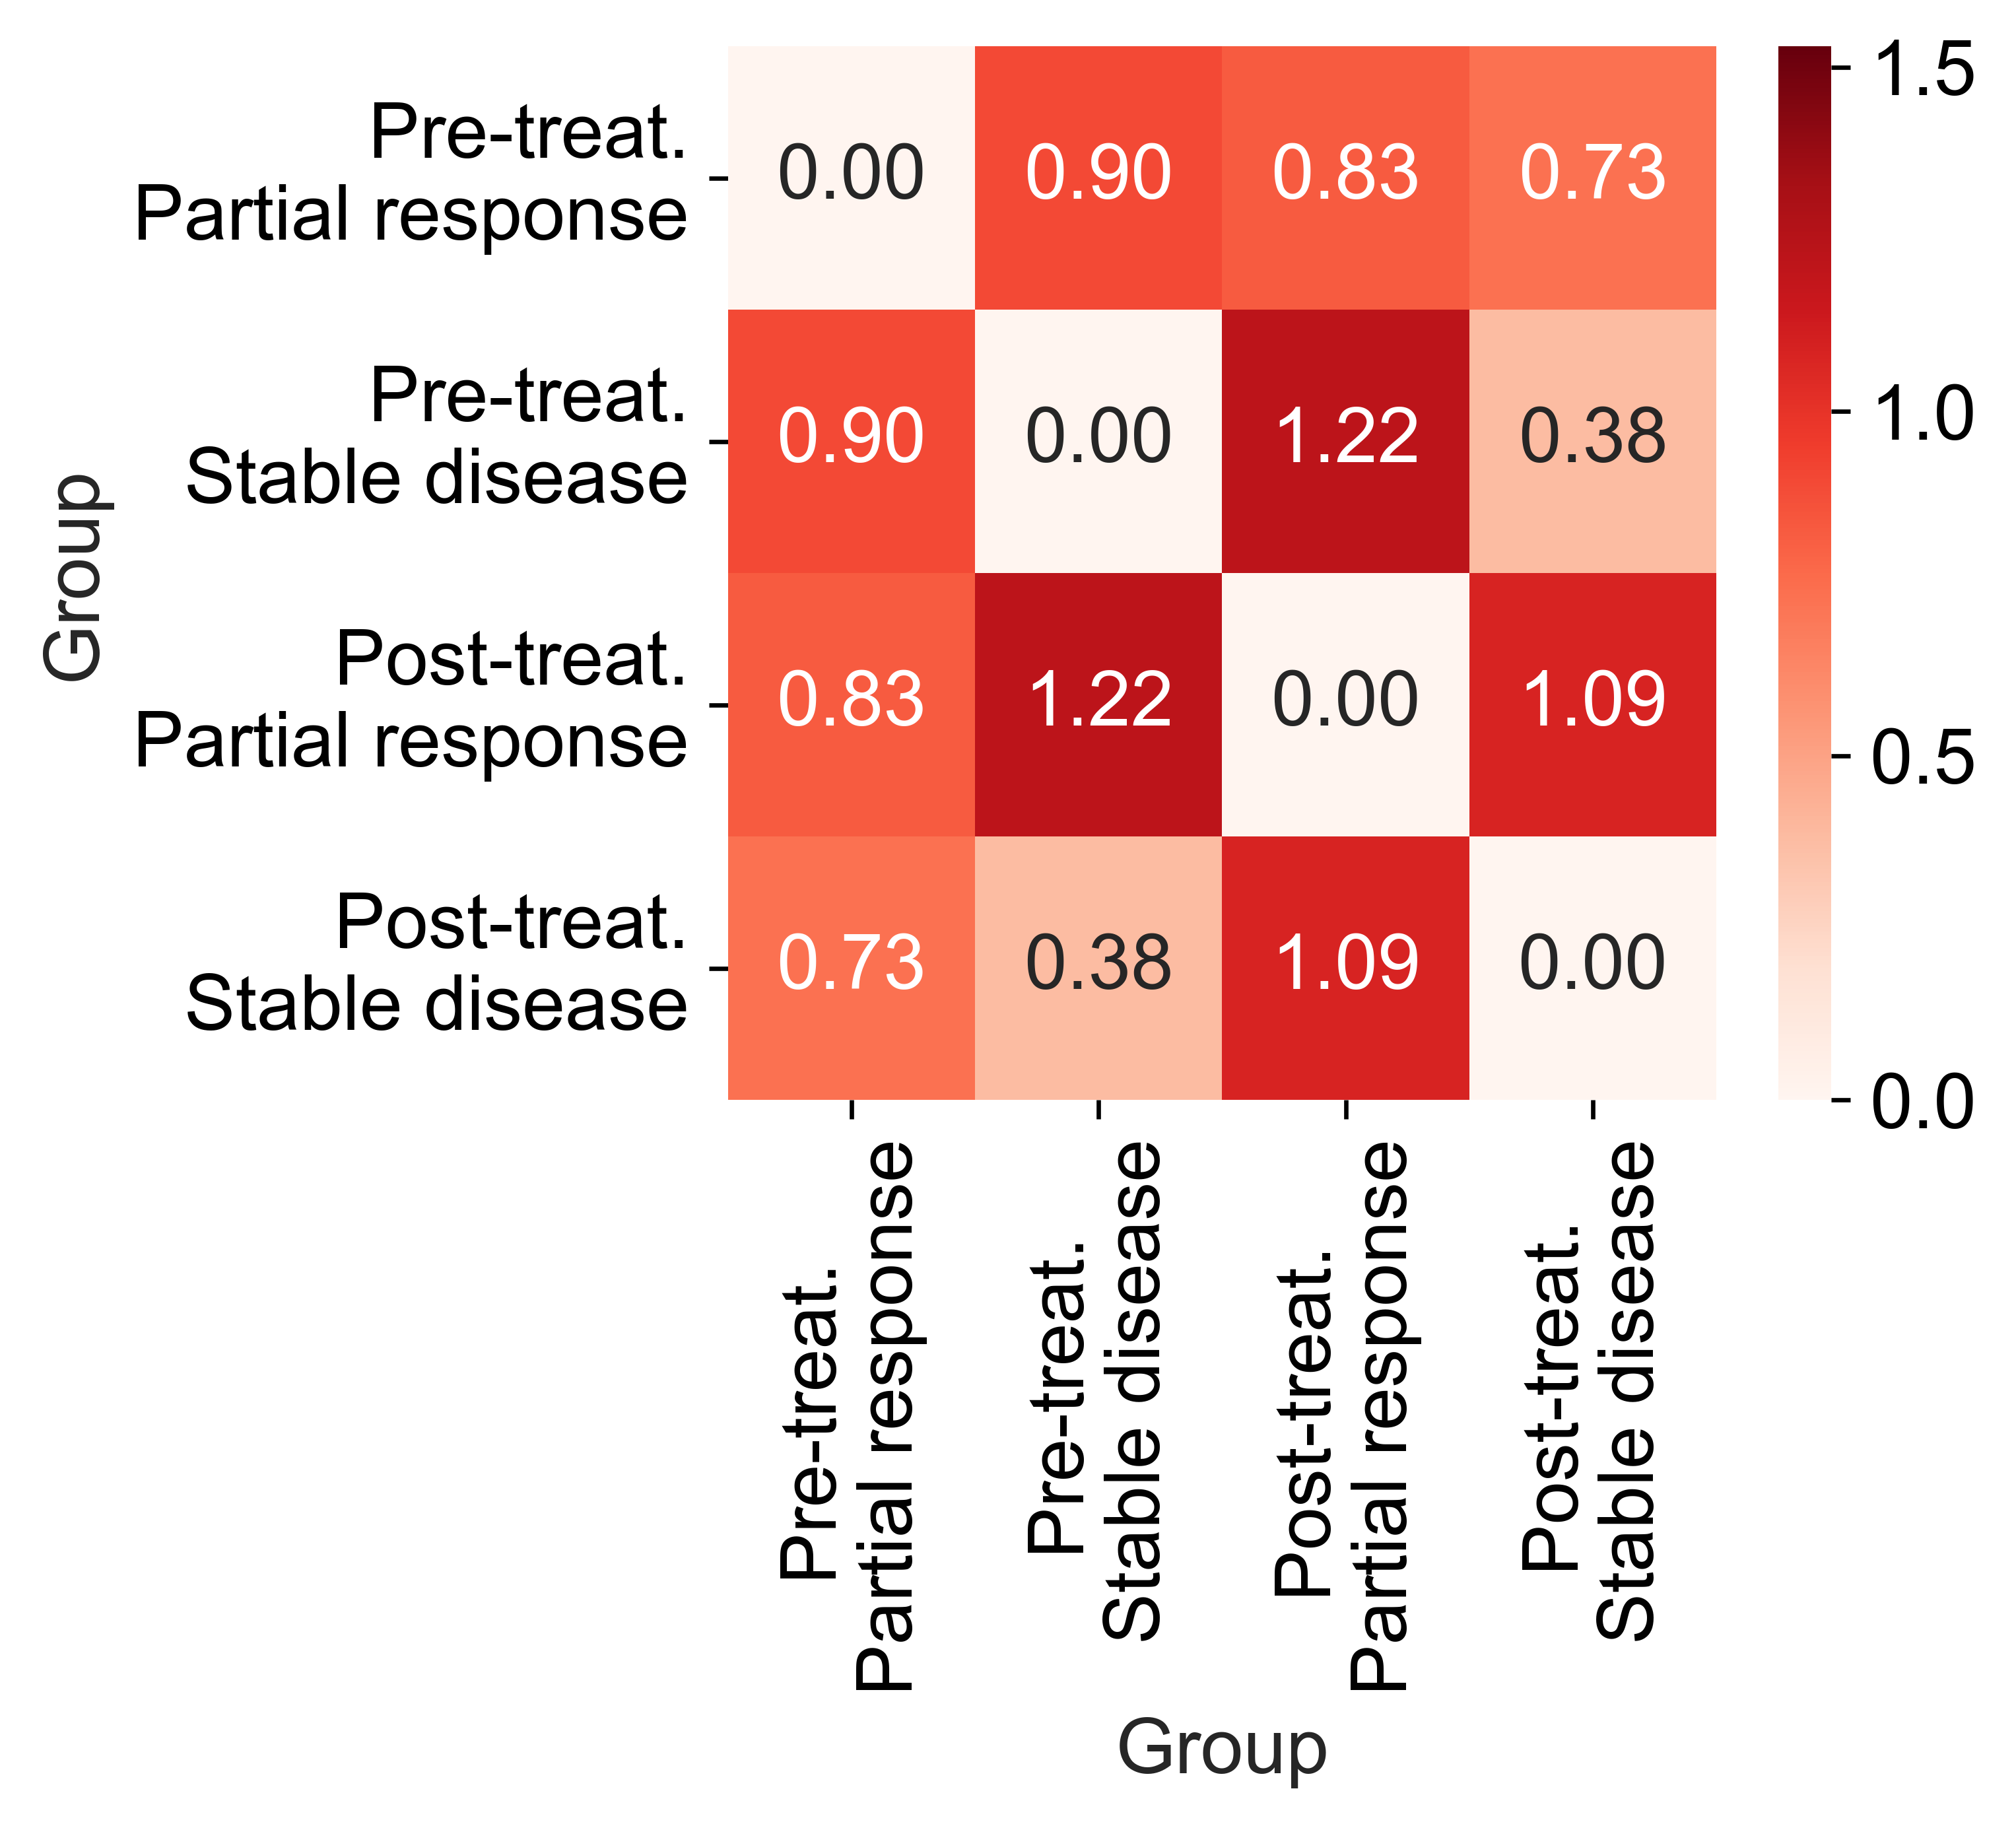

In [31]:
df_chemo = df_chemo.loc[order, order]
fig, ax = plt.subplots(figsize=(4, 3.5))
sns.heatmap(df_chemo, annot=True, fmt=".2f", vmin=global_min, vmax=global_max, cmap="Reds", ax=ax)
plt.xticks(labels=[x.get_text().replace(", ", "\n") for x in ax.get_xticklabels()], ticks=ax.get_xticks())
plt.yticks(labels=[x.get_text().replace(", ", "\n") for x in ax.get_yticklabels()], ticks=ax.get_yticks())
plt.savefig("figures/mse_distance_matrix_Chemo.pdf", bbox_inches="tight")

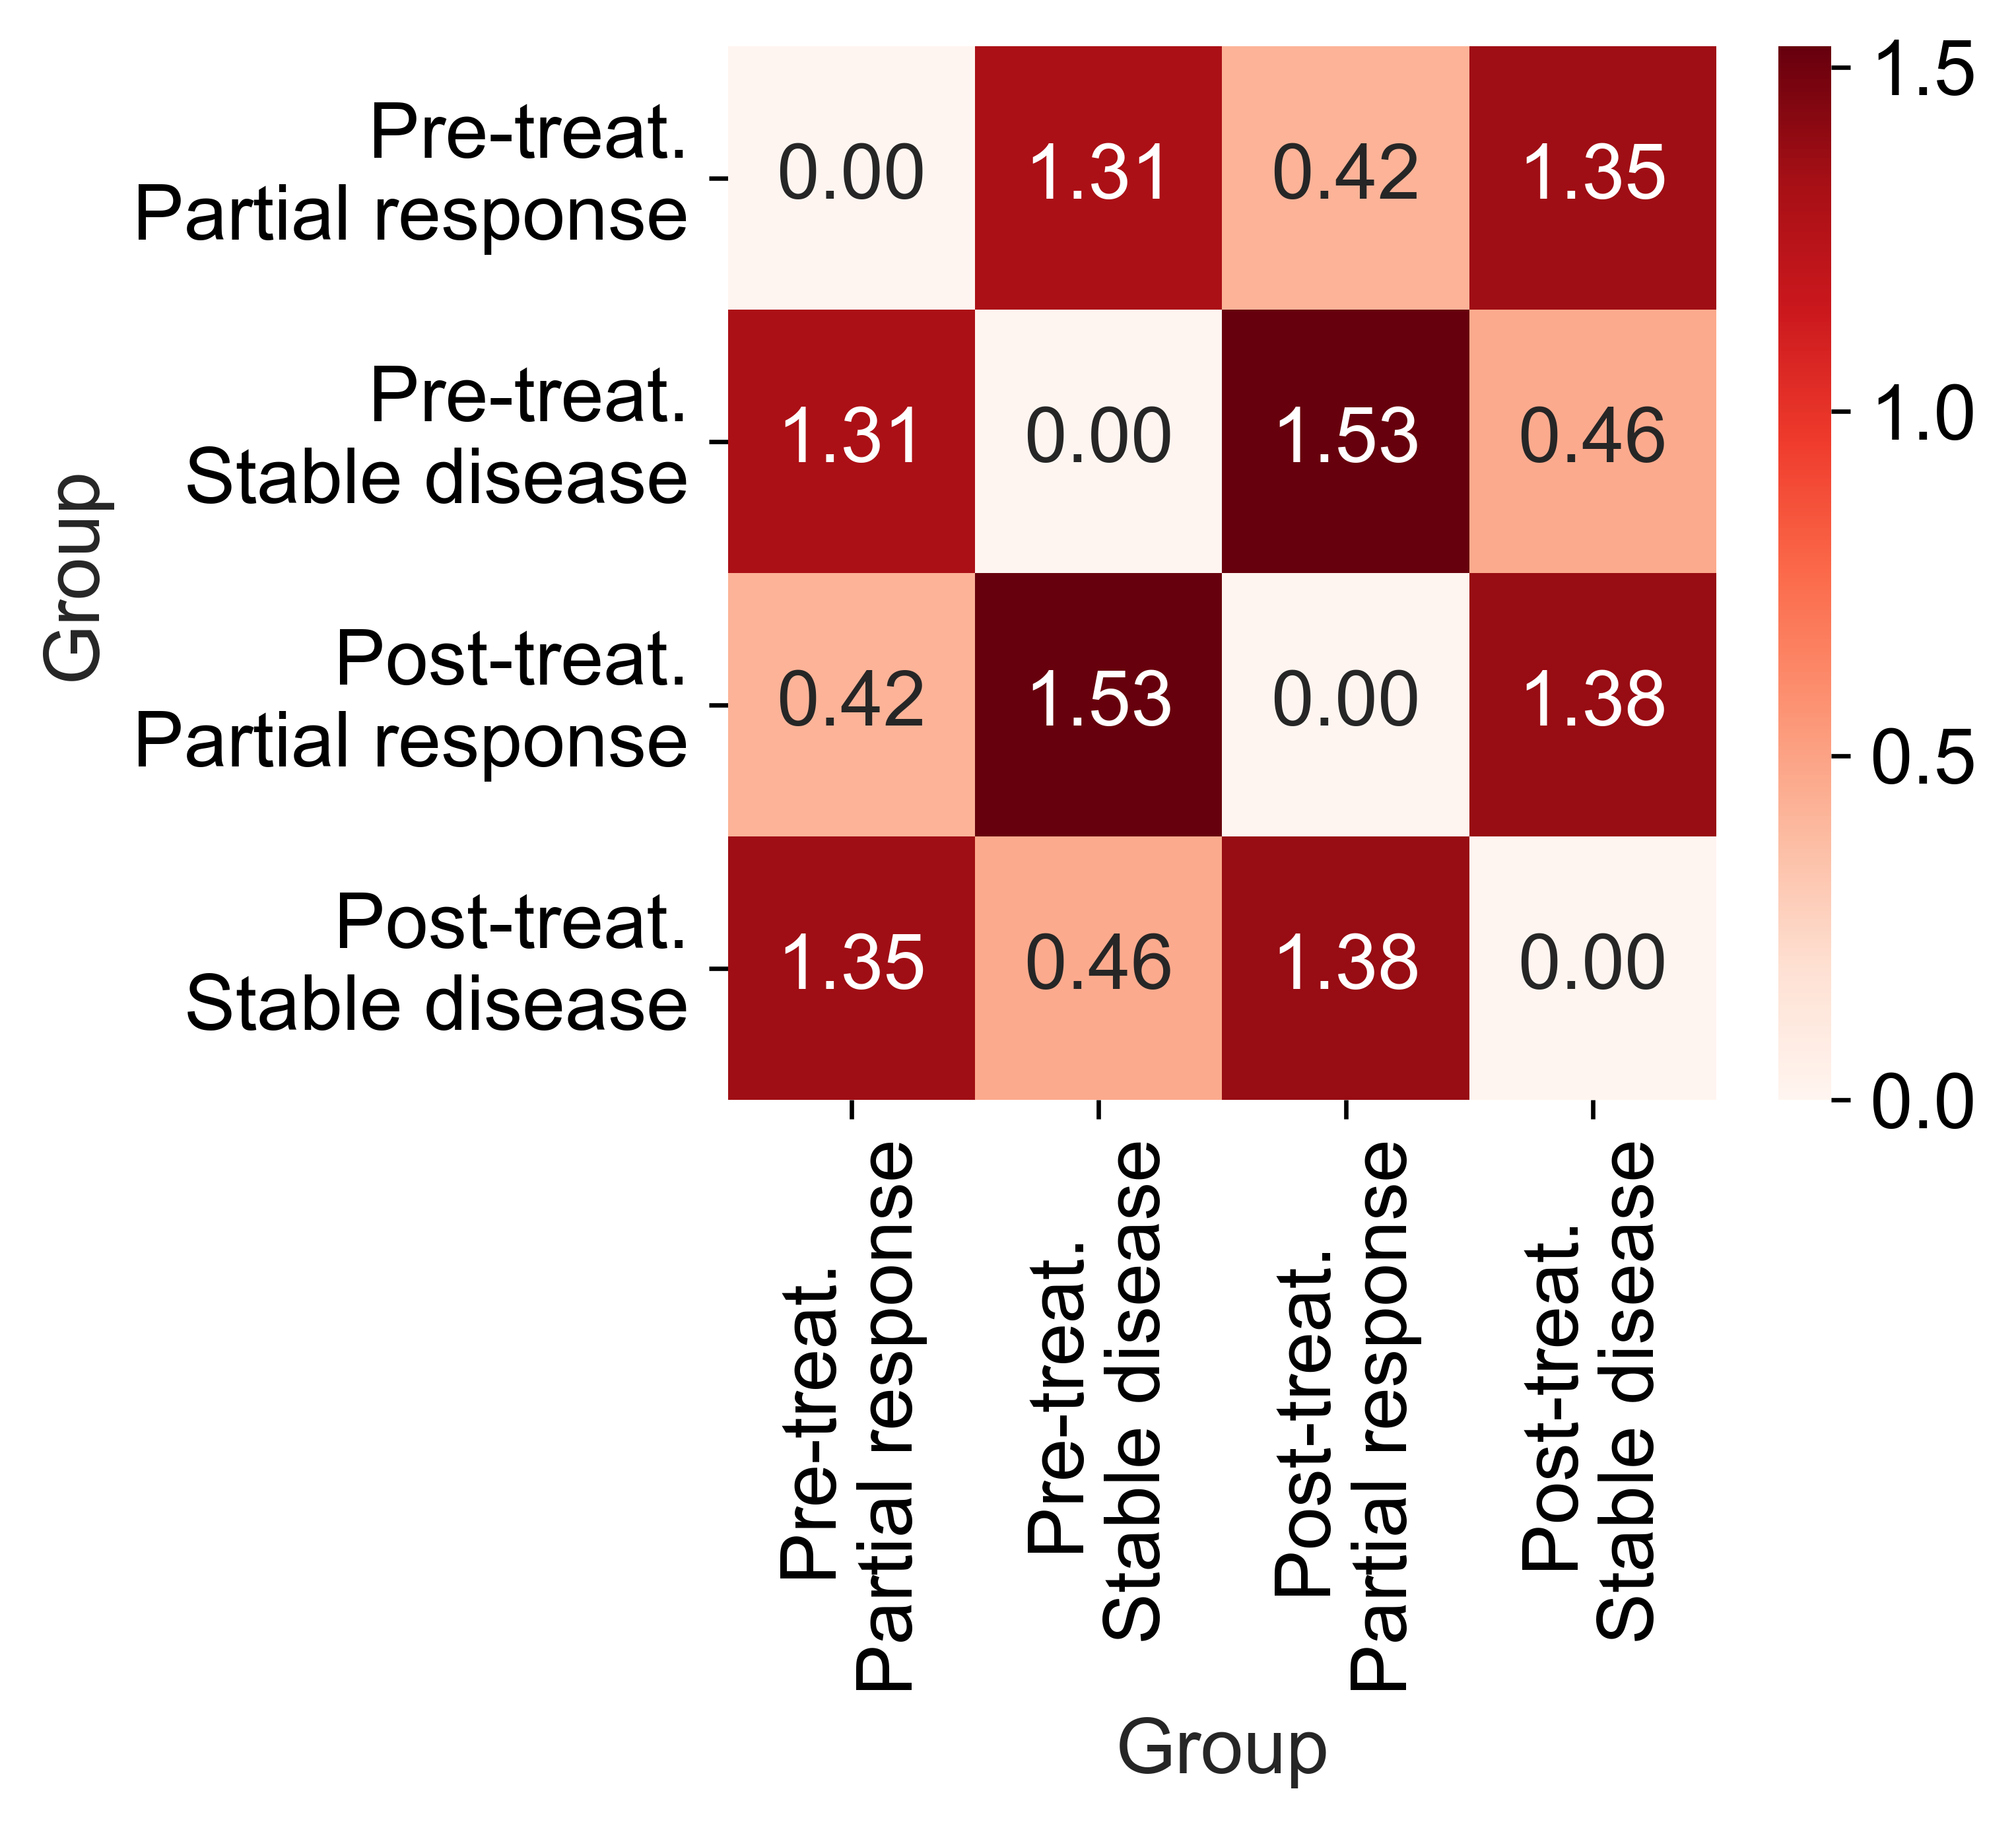

In [32]:
df_chemo_pdl1 = df_chemo_pdl1.loc[order, order]
fig, ax = plt.subplots(figsize=(4, 3.5))
sns.heatmap(df_chemo_pdl1, annot=True, fmt=".2f", vmin=global_min, vmax=global_max, cmap="Reds", ax=ax)
plt.xticks(labels=[x.get_text().replace(", ", "\n") for x in ax.get_xticklabels()], ticks=ax.get_xticks())
plt.yticks(labels=[x.get_text().replace(", ", "\n") for x in ax.get_yticklabels()], ticks=ax.get_yticks())
plt.savefig("figures/mse_distance_matrix_Chemo_Anti_PDL1.pdf", bbox_inches="tight")